###  GR MARKET

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
# filepath = 'C:\\Users\\1098071\\Documents\\RF\\'

In [3]:
df = pd.read_csv('MKTCAP.csv', encoding = 'cp932')
df.head()

,ddate,security_code,時価総額,売上,営業利益,純利益,総資産,現金･現金同等物,有価証券,流動資産,...,営業資産,営業負債,有形固定,使用資産,ROIC,EY,MAGIC,ROIC2,EY2,MKTCAP
0,2000,2HRA,0.000,43.9143,3.2794,3.2482,34.0403,4.4293,1.0819,17.3527,...,11.8415,-9.3213,14.6434,17.1636,0.191067,inf,inf,0.133741,-0.792145,0.000
1,2000,A1OS,0.000,40.9510,0.2350,-0.7530,44.2850,1.7340,4.4300,19.6690,...,13.5050,-12.8700,12.8810,13.5160,0.017387,inf,inf,0.008256,0.183450,0.000
2,2000,AAA,0.000,10.9207,3.0013,2.0257,83.9710,0.0793,0.0000,0.0000,...,-0.0793,8.0549,78.5441,86.5197,0.034689,inf,inf,0.035742,0.064360,0.000
3,2000,AAD,91.902,34.2833,4.7588,2.6313,24.5565,17.7117,0.0000,21.2303,...,3.5186,-5.9551,1.2367,-1.1998,-3.966328,0.051781,-3.517914,0.280107,0.064143,91.902
4,2000,AAH,0.000,379.5033,31.3202,14.7845,264.9924,20.2257,0.9137,158.0551,...,136.9157,-43.4373,43.3560,136.8344,0.228891,inf,inf,0.149144,0.396824,0.000


In [4]:
# type(df['ddate'][0]) #  numpy.int64
# type(d[9])     # int

In [5]:
# # try to convert int time to datetime time 
# # may not be used later 
# import datetime

# d = []
# for i in range(len(df['ddate'])):
#     d.append(datetime.datetime.strptime(np.array_str(df['ddate'].values[i]), '%Y').year)
    
# print (d[9])

In [6]:
# checking the years with the most data available 
df.groupby('ddate').count()

,security_code,時価総額,売上,営業利益,純利益,総資産,現金･現金同等物,有価証券,流動資産,総長期投資,...,営業資産,営業負債,有形固定,使用資産,ROIC,EY,MAGIC,ROIC2,EY2,MKTCAP
ddate,,,,,,,,,,,,,,,,,,,,,
2000,347,347,347,347,347,347,347,347,347,347,...,347,347,347,347,347,347,347,347,347,340
2001,350,350,350,350,350,350,350,350,350,350,...,350,350,350,350,347,349,346,347,350,345
2002,359,359,359,359,359,359,359,359,359,359,...,359,359,359,359,352,354,351,352,355,345
2003,385,385,385,385,385,385,385,385,385,385,...,385,385,385,385,382,383,382,381,383,360
2004,404,404,404,404,404,404,404,404,404,404,...,404,404,404,404,401,401,401,401,401,368
2005,432,432,432,432,432,432,432,432,432,432,...,432,432,432,432,429,429,428,429,430,397
2006,463,463,463,463,463,463,463,463,463,463,...,463,463,463,463,458,462,458,458,462,442
2007,476,476,476,476,476,476,476,476,476,476,...,476,476,476,476,473,476,473,473,476,461
2008,473,473,473,473,473,473,473,473,473,473,...,473,473,473,473,469,472,468,469,473,451


### Data prep

In [7]:
# identify columns with all zero values 
zerocol = df.columns[(df == 0).all()]
type(zerocol)
zerocol

Index(['敷金及び保証金', '賞与引当金', '決算発表日', '剰余金の配当', '自己株式の消却', '新株の発行', '土地1',
       '経常利益', '長期社債(当期返済分)'],
      dtype='object')

In [8]:
# drop all columns with zero only values
df2 = df.drop(zerocol, axis = 1)
len(df2.columns)

67

In [9]:
# prepare 2014 MKTCAP as y

df2014 = df2[df2['ddate'] == 2014][['security_code', 'MKTCAP']]
df2014.head()
# df2014.describe()
len(df2014['security_code'])

531

In [10]:
df2014['MKTCAP'].describe()

count       510.000000
mean       1648.718397
std       10243.368384
min           0.000000
25%           0.000000
50%          12.149350
75%         126.852350
max      108753.579700
Name: MKTCAP, dtype: float64

In [11]:
# # max is at 108753.579700, while the 75% quantile is just 126
# # removing the extremes later in MKTCAP for better visulalizatio and 
# # estimation accuracy 

# print (df2014['MKTCAP'].quantile(0.9))
# print (df2014['MKTCAP'].max())

# print (len(df2014[df2014['MKTCAP'] < 1100]))

In [12]:
# prepare all data in 2013 as features for x

collist = list(df2.columns[1:61])
df2013 = df2[df2['ddate'] == 2013][collist]

# removing '時価総額', which is Market Capitalization
# MKTCAP is the adjusted market capitaliztion with the amount of self owned stocks removed 
del df2013['時価総額']
df2013.head()
# df2013.describe()
# len(df2013['security_code'])

,security_code,売上,営業利益,純利益,総資産,現金･現金同等物,有価証券,流動資産,総長期投資,有形固定資産,...,株主資本,販管費,売上総利益率,営業利益率,株主還元,純現金資産,営業資産,営業負債,有形固定,使用資産
5732,1COV,11357.0000,391.0000,180.0000,10133.0000,37.0000,546.000,3829.0000,1021.00,4442.0000,...,2779.0000,-1576.0000,0.173197,0.034428,0.0,-2947.0000,3246.0000,-1794.0000,4442.0000,5894.0000
5733,1PL,167.1170,12.3130,5.3910,221.7340,15.3940,0.000,142.7590,0.00,78.8160,...,151.3110,-48.5030,0.363913,0.073679,0.0,-44.2760,127.3650,-10.7530,78.8160,195.4280
5734,2GB,126.1297,2.7796,0.8943,88.6293,10.4454,0.030,66.7018,0.01,15.8228,...,47.1524,2.7796,0.000000,0.022038,0.0,3.2530,56.2264,-18.8558,15.8228,53.1934
5735,2HRA,1214.3960,-4.4050,-14.0290,594.6560,109.6240,1.797,341.4460,4.10,197.9060,...,189.1620,-4.4050,0.000000,-0.003627,0.0,-76.1810,230.0250,-144.8070,197.9060,283.1240
5736,3GOK,0.3240,-0.1807,-13.9277,4.6553,0.0235,0.000,0.6903,0.00,0.0000,...,1.2313,-0.1807,0.000000,-0.557716,0.0,-0.9965,0.6668,-2.2038,0.0000,-1.5370


In [13]:
# only keeping companies that exist in both 2013 and 2014 
# removing entries with zero MKTCAP
# will only work on data2 later 

data = pd.merge(df2013, df2014, how='inner', on=['security_code']).dropna()
data2 = data[data['MKTCAP'] != 0]

data2.head()
# data.describe()
# len(data2['security_code'])   # 441

,security_code,売上,営業利益,純利益,総資産,現金･現金同等物,有価証券,流動資産,総長期投資,有形固定資産,...,販管費,売上総利益率,営業利益率,株主還元,純現金資産,営業資産,営業負債,有形固定,使用資産,MKTCAP
1,1PL,167.1170,12.3130,5.3910,221.7340,15.3940,0.0000,142.7590,0.0000,78.8160,...,-48.5030,0.363913,0.073679,0.0,-44.2760,127.3650,-10.7530,78.8160,195.4280,8.265000
2,2GB,126.1297,2.7796,0.8943,88.6293,10.4454,0.0300,66.7018,0.0100,15.8228,...,2.7796,0.000000,0.022038,0.0,3.2530,56.2264,-18.8558,15.8228,53.1934,99.276300
4,3GOK,0.3240,-0.1807,-13.9277,4.6553,0.0235,0.0000,0.6903,0.0000,0.0000,...,-0.1807,0.000000,-0.557716,0.0,-0.9965,0.6668,-2.2038,0.0000,-1.5370,0.074600
5,4DS,60.8263,1.0161,0.7158,78.0599,3.5673,1.4441,32.0063,2.7374,39.9750,...,1.0161,0.000000,0.016705,0.0,-0.9106,26.9949,-7.8704,42.7124,61.8369,55.100962
6,6MP,0.0031,-0.2131,-0.2095,1.7056,0.2130,0.0000,0.2359,0.9691,0.0006,...,-0.2131,0.000000,-68.741935,0.0,1.1821,0.0229,-0.0247,0.0006,-0.0012,1.792000


In [14]:
print (len(data['security_code']))
len(data2['security_code'])

492


332

In [15]:
# all MKTCAP in the dataset are non negative 
sum(data['MKTCAP'] == 0)

160

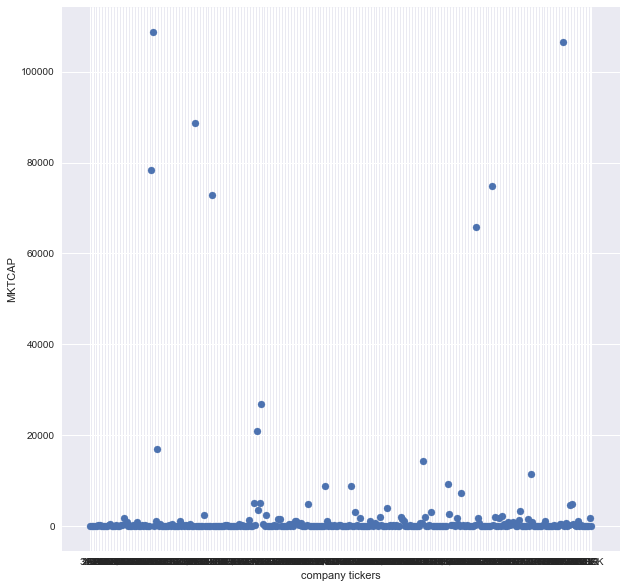

In [16]:
# scatter plot all available data; MKTCAP from 2014 and featueres from 2013 

fig = plt.figure(figsize = (10,10))

num =  len(data2['security_code']) 
x = np.arange(num)
y = data2['MKTCAP']
my_xticks = list(data2['security_code'].values)
plt.xticks(x, my_xticks)
plt.scatter(x, y)
plt.ylabel('MKTCAP')
plt.xlabel('company tickers')

plt.show()

In [17]:
# np.array_str(df2['security_code'].values)

### RF model training in estimating absolute MKTCAP 

In [18]:
# use 2013 data to predict 2014 MKTCAP

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [19]:
# features from data in 2013
featurelist = data2.columns[1:59]
print (len(featurelist))
data2[featurelist].head()

58


,売上,営業利益,純利益,総資産,現金･現金同等物,有価証券,流動資産,総長期投資,有形固定資産,短期借入金,...,株主資本,販管費,売上総利益率,営業利益率,株主還元,純現金資産,営業資産,営業負債,有形固定,使用資産
1,167.1170,12.3130,5.3910,221.7340,15.3940,0.0000,142.7590,0.0000,78.8160,57.500,...,151.3110,-48.5030,0.363913,0.073679,0.0,-44.2760,127.3650,-10.7530,78.8160,195.4280
2,126.1297,2.7796,0.8943,88.6293,10.4454,0.0300,66.7018,0.0100,15.8228,0.000,...,47.1524,2.7796,0.000000,0.022038,0.0,3.2530,56.2264,-18.8558,15.8228,53.1934
4,0.3240,-0.1807,-13.9277,4.6553,0.0235,0.0000,0.6903,0.0000,0.0000,0.000,...,1.2313,-0.1807,0.000000,-0.557716,0.0,-0.9965,0.6668,-2.2038,0.0000,-1.5370
5,60.8263,1.0161,0.7158,78.0599,3.5673,1.4441,32.0063,2.7374,39.9750,1.496,...,65.9583,1.0161,0.000000,0.016705,0.0,-0.9106,26.9949,-7.8704,42.7124,61.8369
6,0.0031,-0.2131,-0.2095,1.7056,0.2130,0.0000,0.2359,0.9691,0.0006,0.000,...,1.6809,-0.2131,0.000000,-68.741935,0.0,1.1821,0.0229,-0.0247,0.0006,-0.0012


In [20]:
# training testing data split 4:1, set random_state to keep datapoints the same in each run 

x_train, x_test, y_train, y_test =  train_test_split(data2[featurelist], data2['MKTCAP'], test_size = 0.2, random_state = 0)

x_train.shape

(265, 58)

In [21]:
# initial regression model with default values  
regr = RandomForestRegressor(random_state=0, bootstrap=True, oob_score = True)
regr.fit(x_train, y_train)

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=True, random_state=0,
           verbose=0, warm_start=False)

In [22]:
# coefficient of determination R^2 of the regression on tesing data 
regr.score(x_test, y_test)

0.58387068729215752

In [23]:
# # score on training data using OOB estimation
# print (regr.oob_score_)

# # print (regr.oob_prediction_)

In [24]:
# feature importance exploration  
# number of features put into the model is 58

importances = regr.feature_importances_
# return indices of the most important featuer last, use [::-1] to reverse order
indices = np.argsort(importances)[::-1]

# standard devivation along columns/ trees
std = np.std([tree.feature_importances_ for tree in regr.estimators_], axis=0)

In [25]:
print("Feature ranking(top down):")

for f in range(x_train.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    print ('{}. feature {}, which is {}, has an importance of {}'.format(f + 1, indices[f], featurelist[indices[f]], importances[indices[f]]))


Feature ranking(top down):
1. feature 57, which is 使用資産, has an importance of 0.27585042310757835
2. feature 25, which is 剰余金, has an importance of 0.10413187931801711
3. feature 0, which is 売上, has an importance of 0.09649194823479305
4. feature 3, which is 総資産, has an importance of 0.09554176696503093
5. feature 35, which is 人件費, has an importance of 0.09347308639485179
6. feature 9, which is 短期借入金, has an importance of 0.09269240985046363
7. feature 40, which is 流動資産その他, has an importance of 0.0926027219279889
8. feature 43, which is 投資資産その他, has an importance of 0.09056535335838352
9. feature 4, which is 現金･現金同等物, has an importance of 0.010712481769465185
10. feature 39, which is 発行済株式数, has an importance of 0.005978956418988259
11. feature 1, which is 営業利益, has an importance of 0.005936029436588948
12. feature 12, which is 無形資産, has an importance of 0.005397270528314909
13. feature 18, which is 売上総利益, has an importance of 0.005224163543317127
14. feature 26, which is 資本金, has an i

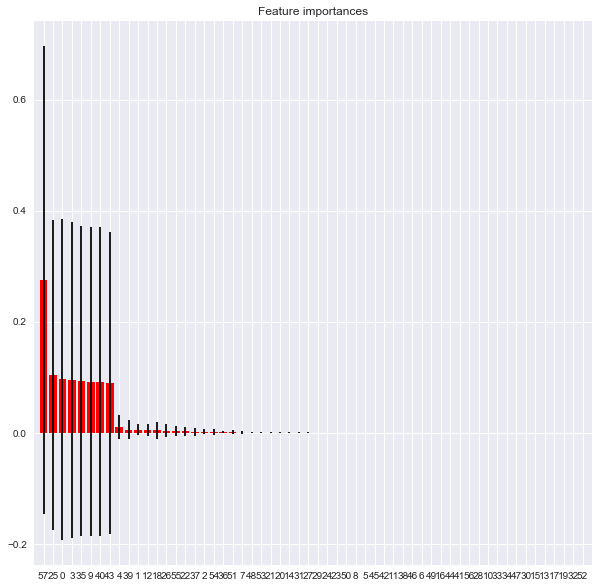

In [26]:
# feature importaance plot 

fig = plt.figure(figsize = (10, 10))

plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()

In [27]:
# # prediction on testing set 
# print (regr.predict(x_test))

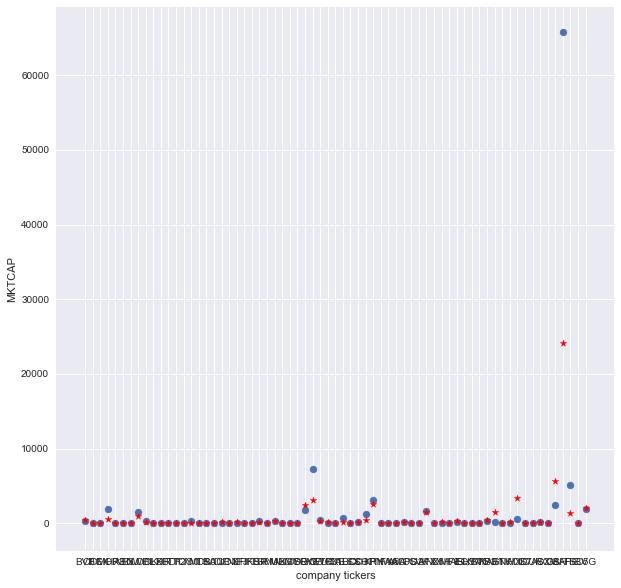

In [28]:
import matplotlib.markers

fig = plt.figure(figsize = (10,10))
ax = plt.subplot(1, 1, 1)

num_predict = len(x_test)
x = np.arange(num_predict)
y = data2['MKTCAP'].loc[y_test.index].values
my_xticks = list(data2['security_code'].loc[x_test.index].values)
plt.xticks(x, my_xticks)   # blue dots are actual values 
plt.scatter(x, y)

# ax. scatter(x_test, regr.predict(x_test))

y1 = regr.predict(x_test)
plt.xticks(x, my_xticks)

ax.scatter(x, y1, color = 'red', marker = '*')  # red dots are predicted MKTCAP from testing data 
plt.ylabel('MKTCAP')
plt.xlabel('company tickers')

plt.show()

In [29]:
# y_test.describe()

In [30]:
# pd.DataFrame(regr.predict(x_test)).describe()

In [31]:
# type(data2['security_code'].loc[x_test.index].values)

### 5-fold CV model evaluation  on initial model 

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

 Valid scoring options are ['accuracy', 'adjusted_rand_score', 'average_precision', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_median_absolute_error', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc']


In [33]:
regr = RandomForestRegressor(random_state=0)
scores = cross_val_score(regr, data2[featurelist], data2['MKTCAP'], cv = 5, scoring = 'r2')

# the neagtive coefficients of correlation indicates that the model couldn't even outperform predicting the mean all the time
print (scores)
print (sum(scores)/5)

[ 0.84366462  0.96116501 -1.2880583   0.81864519  0.86571023]
0.440225347768


move on to parameter tuning using grid search and cross validation score 

### Parameter tuning

In [34]:
len(data2['MKTCAP'])

332

In [35]:
# regr.get_params()

In [36]:
from sklearn.grid_search import GridSearchCV

# data 
x, y = data2[featurelist], data2['MKTCAP']
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size = 0.2, random_state = 0)

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [37]:
model = RandomForestRegressor(random_state = 0, oob_score = True, bootstrap = True)
param_grid = { "n_estimators"      : [800, 600, 700],
           "max_features"      : ['sqrt', 10, 11],
       #    "max_depth"         : [12, 11],
           "min_samples_split" : [2, 3, 4]}
grid_search = GridSearchCV(model, param_grid, n_jobs = -1, cv = 5)
grid_search.fit(x, y)
print (grid_search.best_params_)

{'max_features': 10, 'min_samples_split': 3, 'n_estimators': 700}


In [38]:
# grid_search.grid_scores_

In [39]:
model.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': True,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [40]:
model_tuned = RandomForestRegressor(**grid_search.best_params_, random_state = 0, oob_score = True, bootstrap = True)
model_tuned.fit(x_train, y_train)

# model.set_params(grid_search.best_params_)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=10, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=1,
           oob_score=True, random_state=0, verbose=0, warm_start=False)

In [41]:
# # model_tuned.oob_prediction_
# # Score of the training dataset obtained using an out-of-bag estimate
# model_tuned.oob_score_

In [42]:
# performance on testing data 

model_tuned.score(x_test, y_test)

0.65660339995533723

In [43]:
# eval using 5-fold CV

scores = cross_val_score(model_tuned, x, y, cv = 5, scoring = 'r2')

# the neagtive coefficients of correlation indicates that the model couldn't even outperform predicting the mean all the time
print (scores)
print (sum(scores)/5)


[ 0.83453988  0.97842563  0.12710638  0.85108927  0.81915596]
0.722063422722


In [44]:
# initial regression model with default values  
regr = RandomForestRegressor(random_state=0, bootstrap=True, oob_score = True)
regr.fit(x_train, y_train)

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=True, random_state=0,
           verbose=0, warm_start=False)

In [68]:
x_test.head()

,売上,営業利益,純利益,総資産,現金･現金同等物,有価証券,流動資産,総長期投資,有形固定資産,短期借入金,...,株主資本,販管費,売上総利益率,営業利益率,株主還元,純現金資産,営業資産,営業負債,有形固定,使用資産
80,305.0320,65.1170,50.8200,302.4150,12.5360,0.0000,90.2000,2.8990,178.3820,5.8740,...,1.406180e+02,65.1170,0.000000,0.213476,0.0,-51.0330,77.6640,-68.5440,178.3820,187.5020
89,45.3313,1.0561,-0.7533,31.7844,1.4529,0.0000,11.2270,0.0000,8.4347,0.5369,...,-8.881784e-16,1.0561,0.000000,0.023297,0.0,0.2510,9.4085,-7.9716,8.4347,9.8716
87,19.4490,0.8930,0.3670,18.3620,0.3680,0.0000,10.4480,0.0260,6.3680,1.5080,...,1.150800e+01,-8.5730,0.486709,0.045915,0.0,-3.7590,10.0800,-2.6170,6.3680,13.8310
307,77.9601,9.9245,13.3219,447.6567,72.8377,199.4624,406.5675,1.7266,2.1682,0.0000,...,3.521454e+02,9.9245,0.000000,0.127302,0.0,273.7281,134.2674,-35.4072,2.1682,101.0284
225,46.4980,0.5849,-0.9698,46.6057,3.2676,0.0000,19.6196,0.5237,15.6046,0.0000,...,1.788760e+01,0.5849,0.000000,0.012579,0.0,-11.7198,16.3520,-13.2071,16.0527,19.1976


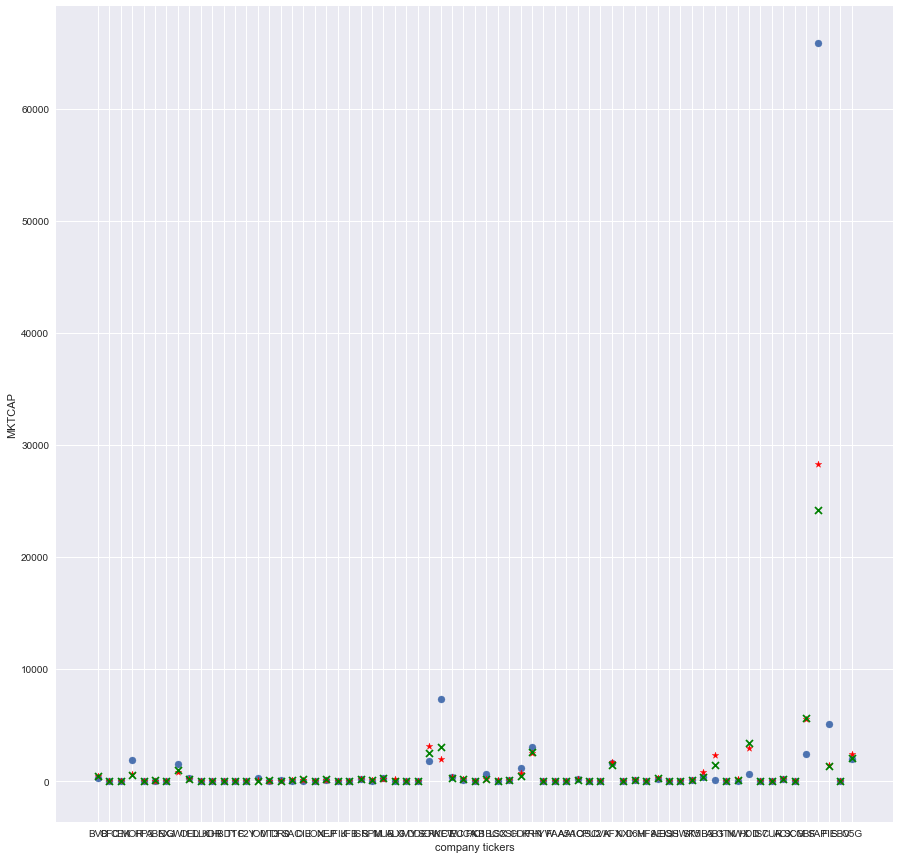

In [45]:
fig = plt.figure(figsize = (15,15))
ax = plt.subplot(1, 1, 1)

num_predict = len(x_test)
x = np.arange(num_predict)
y = data2['MKTCAP'].loc[y_test.index].values
my_xticks = list(data2['security_code'].loc[x_test.index].values)
plt.xticks(x, my_xticks)   # blue dots are actual values 
plt.scatter(x, y)

# ax. scatter(x_test, regr.predict(x_test))

y2 = model_tuned.predict(x_test)
plt.xticks(x, my_xticks)

ax.scatter(x, y2, color = 'red', marker = '*')  # red stars are predicted MKTCAP from the tuned model


y1 = regr.predict(x_test)
plt.xticks(x, my_xticks)

ax.scatter(x, y1, color = 'green', marker = 'x')    # green xs are predicted MKTCAP from initial model with default parameters 
plt.ylabel('MKTCAP')
plt.xlabel('company tickers')

plt.show()

In [46]:
# feature importance from tuned model  
# number of features put into the model is 58

importances = model_tuned.feature_importances_
# return indices of the most important featuer last, use [::-1] to reverse order
indices = np.argsort(importances)[::-1]

# standard devivation along columns/ trees
std = np.std([tree.feature_importances_ for tree in model_tuned.estimators_], axis=0)

In [47]:
print("Feature ranking(top down):")

for f in range(x_train.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    print ('{}. feature {}, which is {}, has an importance of {}'.format(f + 1, indices[f], featurelist[indices[f]], importances[indices[f]]))


Feature ranking(top down):
1. feature 49, which is 販管費, has an importance of 0.048220688559484706
2. feature 1, which is 営業利益, has an importance of 0.04645320523141912
3. feature 20, which is 売掛金, has an importance of 0.045563249249680915
4. feature 37, which is 非流動資産合計, has an importance of 0.044549657985495886
5. feature 27, which is 売上原価, has an importance of 0.042849019014085596
6. feature 35, which is 人件費, has an importance of 0.04178138920452967
7. feature 48, which is 株主資本, has an importance of 0.039528288597151934
8. feature 57, which is 使用資産, has an importance of 0.03893741868794726
9. feature 43, which is 投資資産その他, has an importance of 0.03884545103451852
10. feature 0, which is 売上, has an importance of 0.037212604807185905
11. feature 29, which is 自己資本, has an importance of 0.03498498860774827
12. feature 18, which is 売上総利益, has an importance of 0.034979898606954926
13. feature 8, which is 有形固定資産, has an importance of 0.03211201503269079
14. feature 56, which is 有形固定, has an 

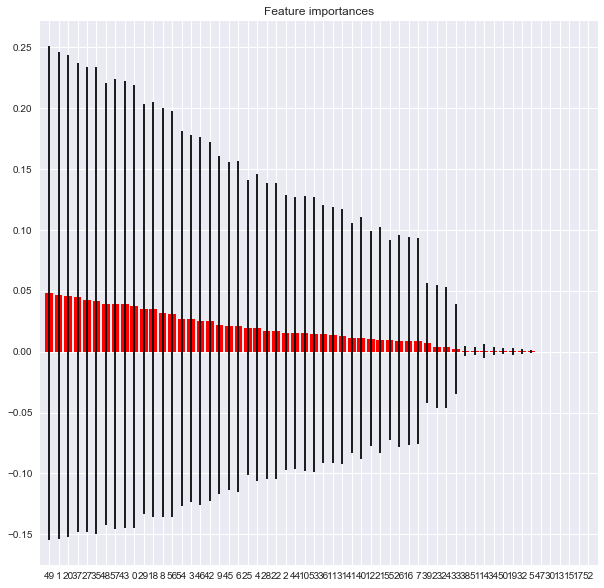

In [48]:
# feature importance plot 

fig = plt.figure(figsize = (10, 10))

plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()

### Tuned model on MKTCAP in 2013 and features in 2012

In [49]:
# df.groupby('ddate').count()

In [50]:
# prepare 2013 MKTCAP as y

df2013 = df2[df2['ddate'] == 2013][['security_code', 'MKTCAP']]
df2013.head()
# df2013.describe()
# len(df2013['security_code'])

,security_code,MKTCAP
5732,1COV,NaN
5733,1PL,30.1950
5734,2GB,134.6720
5735,2HRA,256.5099
5736,3GOK,0.1493


In [51]:
# prepare all data in 2012 as features for x

collist = list(df2.columns[1:61])
df2012 = df2[df2['ddate'] == 2012][collist]

# removing '時価総額', which is Market Capitalization
# MKTCAP is the adjusted market capitaliztion with the amount of self owned stocks removed 
del df2012['時価総額']
df2012.head()
# df2012.describe()
# len(df2012['security_code'])

,security_code,売上,営業利益,純利益,総資産,現金･現金同等物,有価証券,流動資産,総長期投資,有形固定資産,...,株主資本,販管費,売上総利益率,営業利益率,株主還元,純現金資産,営業資産,営業負債,有形固定,使用資産
5206,02P,0.0380,-3.3357,-3.3461,199.3196,0.0176,0.0000,59.2041,140.1148,0.0008,...,198.5418,-3.3357,0.000000,-87.781579,0.0,140.1324,59.1865,-0.6292,0.0008,58.5581
5207,1COV,11610.0000,542.0000,261.0000,10465.0000,44.0000,344.0000,3955.0000,1028.0000,4577.0000,...,2579.0000,-1762.0000,0.198450,0.046684,0.0,-3328.0000,3567.0000,-1983.0000,4577.0000,6161.0000
5208,1PL,190.9720,35.2960,23.9950,213.2670,64.1080,0.0000,138.9020,0.0010,73.3600,...,147.4790,-47.8300,0.435278,0.184823,0.0,27.7000,74.7940,-29.3790,73.3600,118.7750
5209,2GB,146.4849,16.6436,11.4252,94.7422,14.0932,0.3252,73.9049,0.0113,14.5842,...,47.7543,16.6436,0.000000,0.113620,0.0,4.0852,59.4865,-36.5820,14.5842,37.4887
5210,2HRA,1228.9450,26.5350,0.4570,623.1090,89.5880,1.1990,351.1030,4.5810,219.1170,...,213.2830,26.5350,0.000000,0.021592,0.0,-162.4110,260.3160,-81.4360,219.1170,397.9970


In [52]:
# only keeping companies that exist in both 2013 and 2014 
# removing entries with zero MKTCAP

data = pd.merge(df2012, df2013, how='inner', on=['security_code']).dropna()
data3 = data[data['MKTCAP'] != 0]

data3.head()
# data.describe()
# len(data3['security_code'])   # 322

,security_code,売上,営業利益,純利益,総資産,現金･現金同等物,有価証券,流動資産,総長期投資,有形固定資産,...,販管費,売上総利益率,営業利益率,株主還元,純現金資産,営業資産,営業負債,有形固定,使用資産,MKTCAP
1,1PL,190.9720,35.2960,23.9950,213.2670,64.1080,0.0000,138.9020,0.0010,73.3600,...,-47.8300,0.435278,0.184823,0.0,27.7000,74.7940,-29.3790,73.3600,118.7750,30.195000
2,2GB,146.4849,16.6436,11.4252,94.7422,14.0932,0.3252,73.9049,0.0113,14.5842,...,16.6436,0.000000,0.113620,0.0,4.0852,59.4865,-36.5820,14.5842,37.4887,134.672000
3,2HRA,1228.9450,26.5350,0.4570,623.1090,89.5880,1.1990,351.1030,4.5810,219.1170,...,26.5350,0.000000,0.021592,0.0,-162.4110,260.3160,-81.4360,219.1170,397.9970,256.509900
4,3GOK,0.3240,-0.1347,0.2577,16.5240,0.2250,0.0000,0.6350,0.0000,0.0000,...,-0.1347,0.000000,-0.415741,0.0,-0.7950,0.4100,-0.2040,0.0000,0.2060,0.149300
5,4DS,22.6903,2.2841,1.1644,101.4506,5.8625,0.0716,33.2203,0.1419,41.3671,...,2.2841,0.000000,0.100664,0.0,-3.0224,27.2862,-13.4676,41.4787,55.2973,71.793981


In [75]:
featurelist = data3.columns[1:59]
x = data3[featurelist]
y = data3['MKTCAP']

model_tuned.score(x, y)

0.88805992421616486

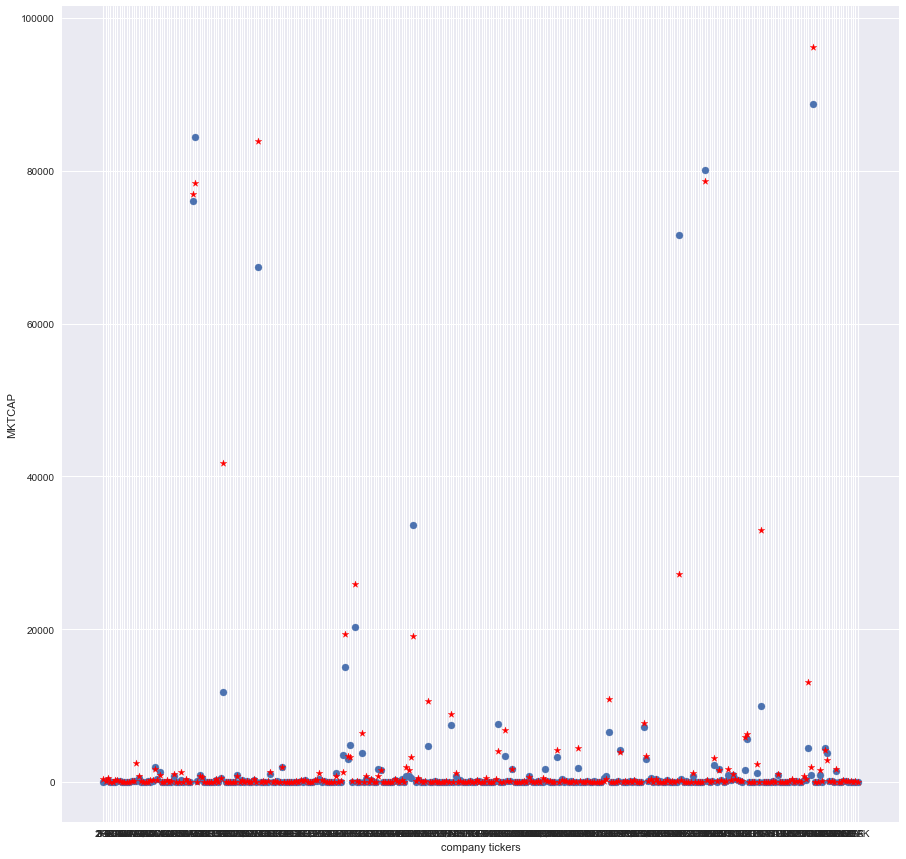

In [74]:
fig = plt.figure(figsize = (15,15))
ax = plt.subplot(1, 1, 1)

num_predict = len(x)
x = np.arange(num_predict)
y = data3['MKTCAP'].values
my_xticks = list(data3['security_code'].values)
plt.xticks(x, my_xticks)   # blue dots are actual values 
plt.scatter(x, y)

# ax. scatter(x_test, regr.predict(x_test))

y2 = model_tuned.predict(data3[featurelist])
plt.xticks(x, my_xticks)

ax.scatter(x, y2, color = 'red', marker = '*')  # red stars are predicted MKTCAP from the tuned model

plt.ylabel('MKTCAP')
plt.xlabel('company tickers')

plt.show()